In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4 as nc
import cmocean as cm

from xgcm import Grid

Use seamount configs to make new topo and ice shelf geometries

Errors with the halo and counting in mom_hor_visc (which seems to assume halo \geq 3) meant that I needed to use 4 points in x direction instead of 2.

In [29]:
toposeamount = xr.open_dataset('../../seamount/z/ocean_geometry.nc')
toposeamounty = toposeamount.D.values.T #rename({'lath':'lonh','lonh':'lath'})
dstoposeamounty = xr.Dataset(data_vars = dict(D =(["y","x"], np.pad(toposeamounty, ((0,0),(1,1)), mode = 'maximum'))), 
                            coords = dict(
                            lonh = ("x",np.array([32.5,37.5,42.5,47.5])),
                            lath = ("y",toposeamount.lonh.values)))#.plot()

In [30]:
#save as netcdf
dstoposeamounty.to_netcdf('INPUT/toposeamounty.nc')


In [31]:
iceseamount = xr.open_dataset('INPUT/fatseamountice.nc')
iceseamounty = xr.Dataset(data_vars = dict(D =(["y","x"], np.pad(iceseamount.D.values.T, ((0,0),(1,1)), mode = 'maximum')),
                                           Ah =(["y","x"], np.pad(iceseamount.Ah.values.T, ((0,0),(1,1)), mode = 'maximum'))), 
                            coords = dict(
                            lonh = ("x",np.array([32.5,37.5,42.5,47.5])),
                            lath = ("y",toposeamount.lonh.values)))

In [32]:
#save as netcdf
iceseamounty.to_netcdf('INPUT/fatseamounticey.nc')


After running with override:



In [7]:
prog_seamounty = xr.open_dataset('seamount-ydxn/prog-seamount-mwipg.nc')
prog_icey = xr.open_dataset('seamount-ydxn/prog-seamountis.nc')
prog_seamountx = xr.open_dataset('intxpa-testing/prog-toposeamount-zstar-minthick1e-12-intxpa-mwipg.nc')
prog_icex = xr.open_dataset('intxpa-testing/prog-zstar-minthick1e-12-intxpa.nc')


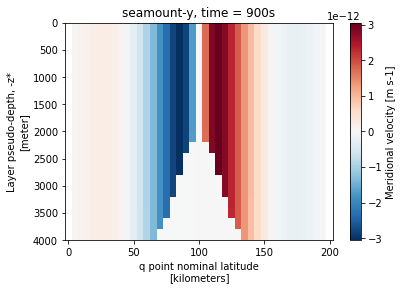

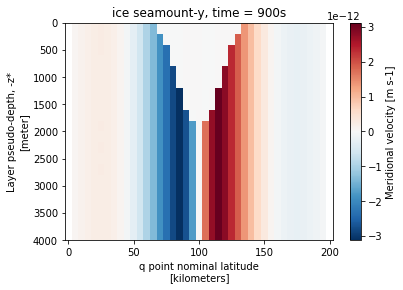

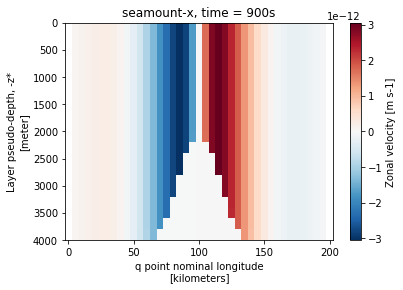

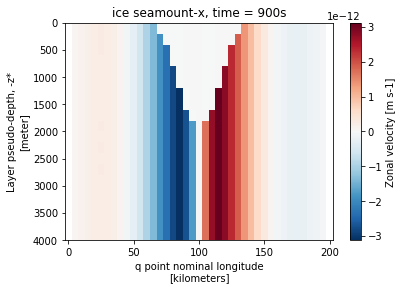

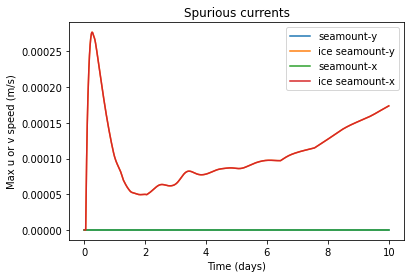

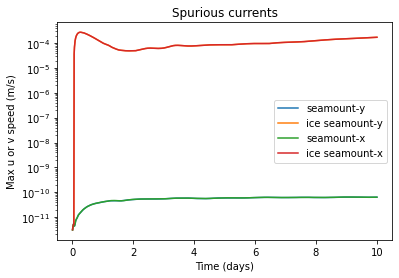

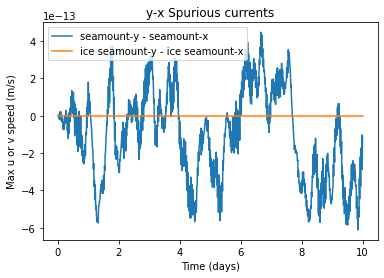

In [11]:
time = 0

prog_seamounty.v.isel(xh = 0,Time = time).plot(yincrease = False)
plt.title('seamount-y, time = '+str(time*900+900)+'s')
plt.show()

prog_icey.v.isel(xh = 0,Time = time).plot(yincrease = False)
plt.title('ice seamount-y, time = '+str(time*900+900)+'s')
plt.show()

prog_seamountx.u.isel(yh = 0, Time = time).plot(yincrease = False)
plt.title('seamount-x, time = '+str(time*900+900)+'s')
plt.show()

prog_icex.u.isel(yh = 0, Time = time).plot(yincrease = False)
plt.title('ice seamount-x, time = '+str(time*900+900)+'s')
plt.show()

plt.plot((np.arange(len(prog_seamounty.Time.values))*900+900)/(3600*24),
         np.abs(prog_seamounty.v.isel(xh = 0)).max(['yq','zl']).values, label = 'seamount-y')
plt.plot((np.arange(len(prog_icey.Time.values))*900+900)/(3600*24),
          np.abs(prog_icey.v.isel(xh = 0)).max(['yq','zl']).values, label = 'ice seamount-y')

plt.plot((np.arange(len(prog_seamountx.Time.values))*900+900)/(3600*24),
          np.abs(prog_seamountx.u.isel(yh = 0)).max(['xq','zl']).values, label = 'seamount-x')
plt.plot((np.arange(len(prog_icex.Time.values))*900+900)/(3600*24),
          np.abs(prog_icex.u.isel(yh = 0)).max(['xq','zl']).values, label = 'ice seamount-x')
plt.ylabel('Max u or v speed (m/s)')
plt.xlabel('Time (days)')
plt.legend()
plt.title('Spurious currents')
plt.show()


plt.plot((np.arange(len(prog_seamounty.Time.values))*900+900)/(3600*24),
         np.abs(prog_seamounty.v.isel(xh = 0)).max(['yq','zl']).values, label = 'seamount-y')
plt.plot((np.arange(len(prog_icey.Time.values))*900+900)/(3600*24),
          np.abs(prog_icey.v.isel(xh = 0)).max(['yq','zl']).values, label = 'ice seamount-y')

plt.plot((np.arange(len(prog_seamountx.Time.values))*900+900)/(3600*24),
          np.abs(prog_seamountx.u.isel(yh = 0)).max(['xq','zl']).values, label = 'seamount-x')
plt.plot((np.arange(len(prog_icex.Time.values))*900+900)/(3600*24),
          np.abs(prog_icex.u.isel(yh = 0)).max(['xq','zl']).values, label = 'ice seamount-x')
plt.ylabel('Max u or v speed (m/s)')
plt.xlabel('Time (days)')
plt.legend()
plt.title('Spurious currents')
plt.yscale('log')
plt.show()

plt.plot((np.arange(len(prog_seamounty.Time.values))*900+900)/(3600*24),
         np.abs(prog_seamounty.v.isel(xh = 0)).max(['yq','zl']).values-np.abs(prog_seamountx.u.isel(yh = 0)).max(['xq','zl']).values, label = 'seamount-y - seamount-x')
plt.plot((np.arange(len(prog_icey.Time.values))*900+900)/(3600*24),
          np.abs(prog_icey.v.isel(xh = 0)).max(['yq','zl']).values-np.abs(prog_icex.u.isel(yh = 0)).max(['xq','zl']).values, label = 'ice seamount-y - ice seamount-x')

plt.ylabel('Max u or v speed (m/s)')
plt.xlabel('Time (days)')
plt.legend()
plt.title('y-x Spurious currents')
plt.show()



Therefore, implementation of intxpa in y direction is same as x direction i.e. correct at first timestep. Difference between 2D seamount and 3D ISOMIP+ can't be attributed to incorrect implementation of intxpa bug fix v1 

# How about a 3D seamount?

Built into MOM6 - just run topo version first with 40x40 grid, the seamount initialization with seamount y scale the same as x scale.

Needed to decrease ice initialization tolerance (from 1e-14 to 1e-13) to make it actually go forward.

In [3]:
toposeamount3D = xr.open_dataset('ocean_geometry.nc').D
toposeamount3D.to_netcdf('INPUT/toposeamount3D.nc')



In [7]:
toposeamount = xr.open_dataset('INPUT/toposeamount3D.nc')
toposeamountAh = xr.open_dataset('ocean_geometry.nc').Ah
seamountice = toposeamount.D
seamountice = 4000-seamountice
seamounticeds = xr.merge([(seamountice)*1035/900, toposeamountAh])
seamounticeds.to_netcdf('INPUT/fatseamountice3D.nc')


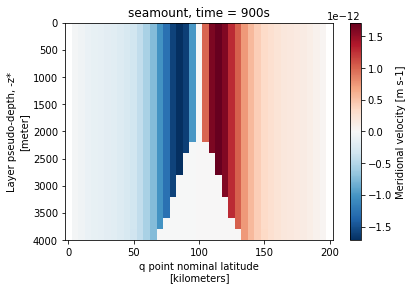

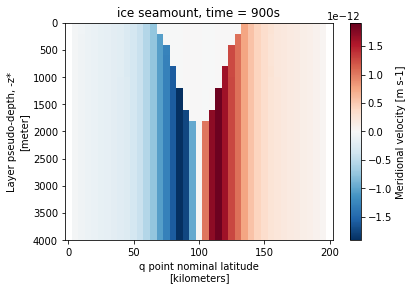

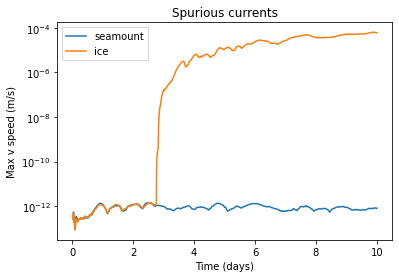

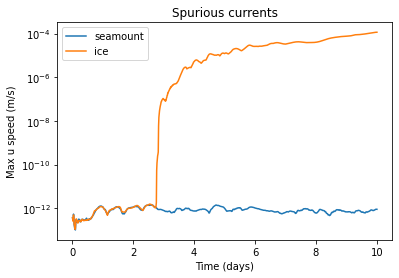

In [9]:
prog_seamount3d = xr.open_dataset('3Dseamount/prog-seamount-mwipg.nc')
prog_ice3d = xr.open_dataset('3Dseamount/prog-seamountis.nc')

time = 0
prog_seamount3d.v.isel(xh = 20,Time = time).plot(yincrease = False)
plt.title('seamount, time = '+str(time*900+900)+'s')
plt.show()

prog_ice3d.v.isel(xh = 20,Time = time).plot(yincrease = False)
plt.title('ice seamount, time = '+str(time*900+900)+'s')
plt.show()

plt.plot((np.arange(len(prog_seamount3d.Time.values))*900+900)/(3600*24),
         np.abs(prog_seamount3d.v.isel(xh = 0)).max(['yq','zl']).values, label = 'seamount')
plt.plot((np.arange(len(prog_ice3d.Time.values))*900+900)/(3600*24),
          np.abs(prog_ice3d.v.isel(xh = 0)).max(['yq','zl']).values, label = 'ice')

plt.ylabel('Max v speed (m/s)')
plt.xlabel('Time (days)')
plt.legend()
plt.title('Spurious currents')
plt.yscale('log')
plt.show()


plt.plot((np.arange(len(prog_seamount3d.Time.values))*900+900)/(3600*24),
         np.abs(prog_seamount3d.u.isel(yh = 0)).max(['xq','zl']).values, label = 'seamount')
plt.plot((np.arange(len(prog_ice3d.Time.values))*900+900)/(3600*24),
          np.abs(prog_ice3d.u.isel(yh = 0)).max(['xq','zl']).values, label = 'ice')

plt.ylabel('Max u speed (m/s)')
plt.xlabel('Time (days)')
plt.legend()
plt.title('Spurious currents')
plt.yscale('log')
plt.show()


## weird.....

But, small (same as seamount at time = 0). So 3D is not intrinsically the issue for why ISOMIP+ has nonzero vels at first timestep.

must be a steep topo or grounding line issue.



# retry y direction seamount with namelist parameter, not remapped x seamount

In [3]:
toposeamount = xr.open_dataset('ocean_geometry.nc')
seamountice = toposeamount.D
seamountice = 4000-seamountice
seamounticeds = xr.merge([(seamountice)*1035/900, toposeamount.Ah])
seamounticeds.to_netcdf('INPUT/fatseamountice-yv2.nc')


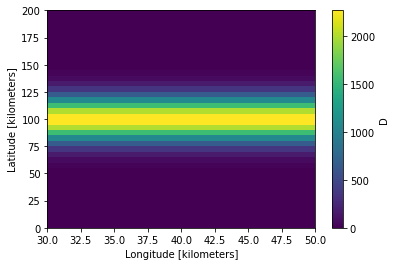

In [4]:
ds = xr.open_dataset('INPUT/fatseamountice-yv2.nc')
ds.D.plot()

In [16]:
prog_seamounty = xr.open_dataset('seamount-ydxn/prog-seamount-mwipg-v2.nc')
prog_icey = xr.open_dataset('seamount-ydxn/prog-seamount-is-v2.nc')
prog_icey2 = xr.open_dataset('seamount-ydxn/prog-seamount-is-v2-init1e-14.nc')


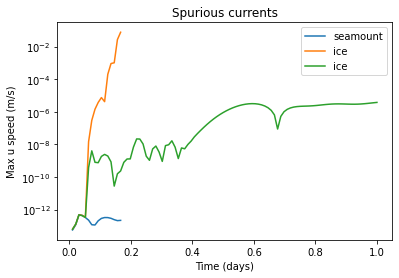

In [17]:
plt.plot((np.arange(len(prog_seamounty.Time.values))*900+900)/(3600*24),
         np.abs(prog_seamounty.v.isel(yq = 1)).max(['xh','zl']).values, label = 'seamount')
plt.plot((np.arange(len(prog_icey.Time.values))*900+900)/(3600*24),
          np.abs(prog_icey.v.isel(yq = 1)).max(['xh','zl']).values, label = 'ice')
plt.plot((np.arange(len(prog_icey2.Time.values))*900+900)/(3600*24),
          np.abs(prog_icey2.v.isel(yq = 1)).max(['xh','zl']).values, label = 'ice')

plt.ylabel('Max u speed (m/s)')
plt.xlabel('Time (days)')
plt.legend()
plt.title('Spurious currents')
plt.yscale('log')
plt.show()


check initialisation

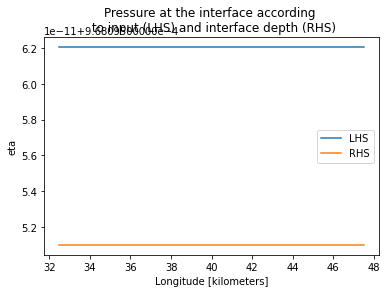

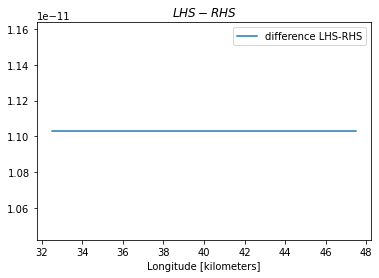

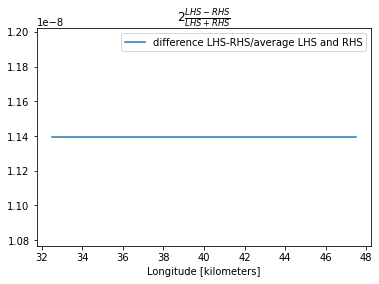

interface z values [9.55554356e-08 9.55554356e-08 9.55554356e-08 9.55554356e-08]


In [18]:
H_thick = xr.open_dataset('INPUT/fatseamountice-yv2.nc').D
(8820*H_thick).isel(lath = 0).plot(label = 'LHS')

g = 9.8
rho_0 = 1000
z = -xr.open_dataset('MOM_IC.nc').eta.isel(Interface = 0, lath = 0, Time = 0)
S_top = 33.8
S_bot = 34.55
H = 4000
beta = 1.0

RHS = g*rho_0*(z + beta/rho_0*((S_top*z)+(z**2/2)*(S_bot-S_top)/H))

(RHS).plot(label = 'RHS')
plt.title('Pressure at the interface according \n to input (LHS) and interface depth (RHS)')

plt.legend()
plt.show()

((8820*H_thick).isel(lath = 0)-RHS).plot(label = 'difference LHS-RHS')
plt.legend()
plt.title('$LHS-RHS$')
plt.show()

(2*((8820*H_thick).isel(lath = 0)-RHS)/(((8820*H_thick).isel(lath = 0)+RHS))).plot(label = 'difference LHS-RHS/average LHS and RHS')
plt.legend()
plt.title(r'$2\frac{LHS-RHS}{LHS+RHS}$')
plt.show()

print('interface z values', z.values)

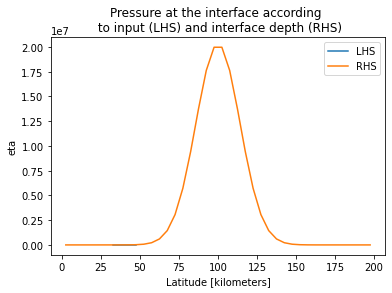

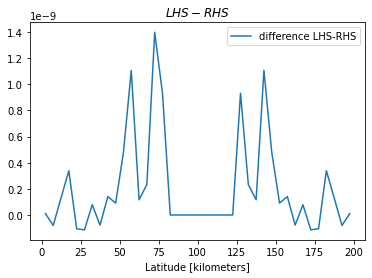

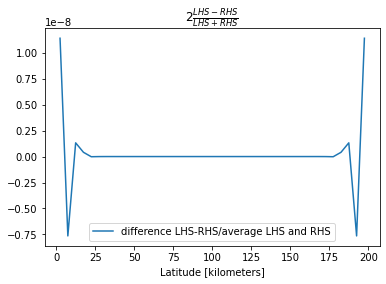

interface z values [9.55554356e-08 1.02731440e-06 9.74688854e-06 8.16096987e-05
 6.03018641e-04 3.93217548e-03 2.26281075e-02 1.14915011e-01
 5.15013330e-01 2.03691695e+00 7.10953548e+00 2.18988816e+01
 5.95271288e+01 1.42797080e+02 3.02297049e+02 5.64751798e+02
 9.31087372e+02 1.35467210e+03 1.73937274e+03 1.97092614e+03
 1.97092614e+03 1.73937274e+03 1.35467210e+03 9.31087372e+02
 5.64751798e+02 3.02297049e+02 1.42797080e+02 5.95271288e+01
 2.18988816e+01 7.10953548e+00 2.03691695e+00 5.15013330e-01
 1.14915011e-01 2.26281075e-02 3.93217548e-03 6.03018641e-04
 8.16096987e-05 9.74688854e-06 1.02731440e-06 9.55554356e-08]


In [14]:
H_thick = xr.open_dataset('INPUT/fatseamountice-yv2.nc').D
(8820*H_thick).isel(lath = 0).plot(label = 'LHS')

g = 9.8
rho_0 = 1000
z = -xr.open_dataset('MOM_IC.nc').eta.isel(Interface = 0, lonh = 0, Time = 0)
S_top = 33.8
S_bot = 34.55
H = 4000
beta = 1.0

RHS = g*rho_0*(z + beta/rho_0*((S_top*z)+(z**2/2)*(S_bot-S_top)/H))

(RHS).plot(label = 'RHS')
plt.title('Pressure at the interface according \n to input (LHS) and interface depth (RHS)')

plt.legend()
plt.show()

((8820*H_thick).isel(lonh = 0)-RHS).plot(label = 'difference LHS-RHS')
plt.legend()
plt.title('$LHS-RHS$')
plt.show()

(2*((8820*H_thick).isel(lonh = 0)-RHS)/(((8820*H_thick).isel(lonh = 0)+RHS))).plot(label = 'difference LHS-RHS/average LHS and RHS')
plt.legend()
plt.title(r'$2\frac{LHS-RHS}{LHS+RHS}$')
plt.show()

print('interface z values', z.values)

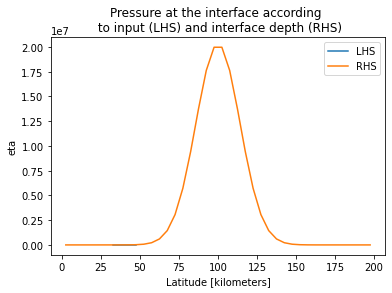

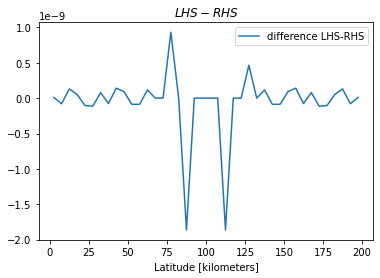

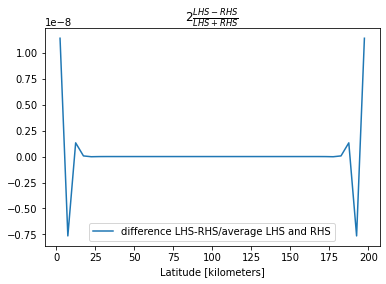

interface z values [9.55554356e-08 1.02731440e-06 9.74688854e-06 8.16096988e-05
 6.03018641e-04 3.93217548e-03 2.26281075e-02 1.14915011e-01
 5.15013330e-01 2.03691695e+00 7.10953548e+00 2.18988816e+01
 5.95271288e+01 1.42797080e+02 3.02297049e+02 5.64751798e+02
 9.31087372e+02 1.35467210e+03 1.73937274e+03 1.97092614e+03
 1.97092614e+03 1.73937274e+03 1.35467210e+03 9.31087372e+02
 5.64751798e+02 3.02297049e+02 1.42797080e+02 5.95271288e+01
 2.18988816e+01 7.10953548e+00 2.03691695e+00 5.15013330e-01
 1.14915011e-01 2.26281075e-02 3.93217548e-03 6.03018641e-04
 8.16096988e-05 9.74688854e-06 1.02731440e-06 9.55554356e-08]


In [19]:
H_thick = xr.open_dataset('INPUT/fatseamountice-yv2.nc').D
(8820*H_thick).isel(lath = 0).plot(label = 'LHS')

g = 9.8
rho_0 = 1000
z = -xr.open_dataset('MOM_IC.nc').eta.isel(Interface = 0, lonh = 0, Time = 0)
S_top = 33.8
S_bot = 34.55
H = 4000
beta = 1.0

RHS = g*rho_0*(z + beta/rho_0*((S_top*z)+(z**2/2)*(S_bot-S_top)/H))

(RHS).plot(label = 'RHS')
plt.title('Pressure at the interface according \n to input (LHS) and interface depth (RHS)')

plt.legend()
plt.show()

((8820*H_thick).isel(lonh = 0)-RHS).plot(label = 'difference LHS-RHS')
plt.legend()
plt.title('$LHS-RHS$')
plt.show()

(2*((8820*H_thick).isel(lonh = 0)-RHS)/(((8820*H_thick).isel(lonh = 0)+RHS))).plot(label = 'difference LHS-RHS/average LHS and RHS')
plt.legend()
plt.title(r'$2\frac{LHS-RHS}{LHS+RHS}$')
plt.show()

print('interface z values', z.values)

# try doubled y domain for x seamount

In [2]:
toposeamount = xr.open_dataset('ocean_geometry.nc')
seamountice = toposeamount.D
seamountice = 4000-seamountice
seamounticeds = xr.merge([(seamountice)*1035/900, toposeamount.Ah])
#seamounticeds.to_netcdf('INPUT/fatseamountice-x2.nc')


analyse

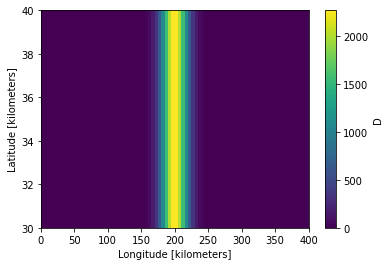

In [3]:
ds = xr.open_dataset('INPUT/fatseamountice-x2.nc')
ds.D.plot()

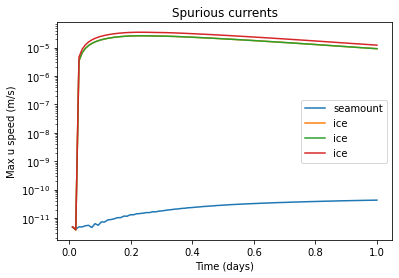

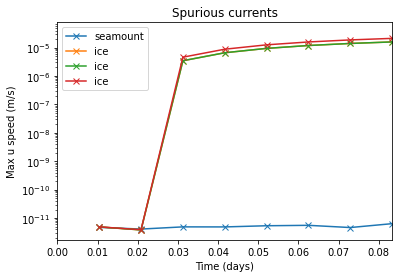

In [7]:
prog_seamountx2 = xr.open_dataset('seamount-x2/prog-seamount-x2-mwipg.nc')
prog_icex2 = xr.open_dataset('seamount-x2/prog-seamount-x2-is.nc')
prog_icex2v2 = xr.open_dataset('seamount-x2/prog-seamount-x2-is-5e-15.nc')
prog_icex2v3 = xr.open_dataset('seamount-x2/prog-seamount-x2-is-1e-10.nc')

plt.plot((np.arange(len(prog_seamountx2.Time.values))*900+900)/(3600*24),
         np.abs(prog_seamountx2.u.isel(yh = 0)).max(['xq','zl']).values, label = 'seamount')
plt.plot((np.arange(len(prog_icex2.Time.values))*900+900)/(3600*24),
          np.abs(prog_icex2.u.isel(yh = 0)).max(['xq','zl']).values, label = 'ice')
plt.plot((np.arange(len(prog_icex2v2.Time.values))*900+900)/(3600*24),
          np.abs(prog_icex2v2.u.isel(yh = 0)).max(['xq','zl']).values, label = 'ice')
plt.plot((np.arange(len(prog_icex2v3.Time.values))*900+900)/(3600*24),
          np.abs(prog_icex2v3.u.isel(yh = 0)).max(['xq','zl']).values, label = 'ice')

plt.ylabel('Max u speed (m/s)')
plt.xlabel('Time (days)')
plt.legend()
plt.title('Spurious currents')
plt.yscale('log')
plt.show()

plt.plot((np.arange(len(prog_seamountx2.Time.values))*900+900)/(3600*24),
         np.abs(prog_seamountx2.u.isel(yh = 0)).max(['xq','zl']).values, label = 'seamount', marker = 'x')
plt.plot((np.arange(len(prog_icex2.Time.values))*900+900)/(3600*24),
          np.abs(prog_icex2.u.isel(yh = 0)).max(['xq','zl']).values, label = 'ice', marker = 'x')
plt.plot((np.arange(len(prog_icex2v2.Time.values))*900+900)/(3600*24),
          np.abs(prog_icex2v2.u.isel(yh = 0)).max(['xq','zl']).values, label = 'ice', marker = 'x')
plt.plot((np.arange(len(prog_icex2v3.Time.values))*900+900)/(3600*24),
          np.abs(prog_icex2v3.u.isel(yh = 0)).max(['xq','zl']).values, label = 'ice', marker = 'x')
plt.xlim(0,2/24)
plt.ylabel('Max u speed (m/s)')
plt.xlabel('Time (days)')
plt.legend()
plt.title('Spurious currents')
plt.yscale('log')
plt.show()


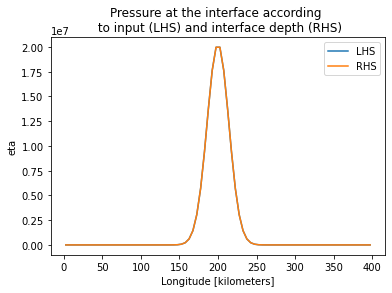

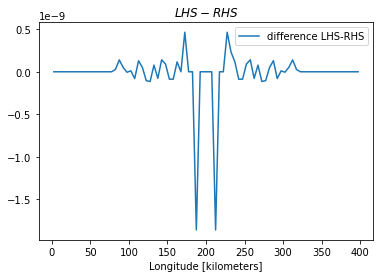

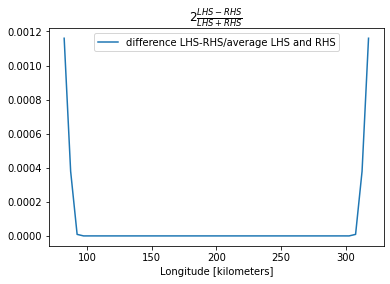

interface z values [-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  2.27373675e-12  3.64082098e-11  5.68178393e-10  7.84393706e-09
  9.55554356e-08  1.02731440e-06  9.74688854e-06  8.16096988e-05
  6.03018641e-04  3.93217548e-03  2.26281075e-02  1.14915011e-01
  5.15013330e-01  2.03691695e+00  7.10953548e+00  2.18988816e+01
  5.95271288e+01  1.42797080e+02  3.02297049e+02  5.64751798e+02
  9.31087372e+02  1.35467210e+03  1.73937274e+03  1.97092614e+03
  1.97092614e+03  1.73937274e+03  1.35467210e+03  9.31087372e+02
  5.64751798e+02  3.02297049e+02  1.42797080e+02  5.95271288e+01
  2.18988816e+01  7.10953548e+00  2.03691695e+00  5.15013330e-01
  1.14915011e-01  2.26281075e-02  3.93217548e-03  6.03018641e-04
  8.16096988e-05  9.74688854e-06  1.02731440e-06  9.55554356e-08
  7.84

In [5]:
H_thick = xr.open_dataset('INPUT/fatseamountice-x2.nc').D
(8820*H_thick).isel(lath = 0).plot(label = 'LHS')

g = 9.8
rho_0 = 1000
z = -xr.open_dataset('MOM_IC.nc').eta.isel(Interface = 0, lath = 0, Time = 0)
S_top = 33.8
S_bot = 34.55
H = 4000
beta = 1.0

RHS = g*rho_0*(z + beta/rho_0*((S_top*z)+(z**2/2)*(S_bot-S_top)/H))

(RHS).plot(label = 'RHS')
plt.title('Pressure at the interface according \n to input (LHS) and interface depth (RHS)')

plt.legend()
plt.show()

((8820*H_thick).isel(lath = 0)-RHS).plot(label = 'difference LHS-RHS')
plt.legend()
plt.title('$LHS-RHS$')
plt.show()

(2*((8820*H_thick).isel(lath = 0)-RHS)/(((8820*H_thick).isel(lath = 0)+RHS))).plot(label = 'difference LHS-RHS/average LHS and RHS')
plt.legend()
plt.title(r'$2\frac{LHS-RHS}{LHS+RHS}$')
plt.show()

print('interface z values', z.values)

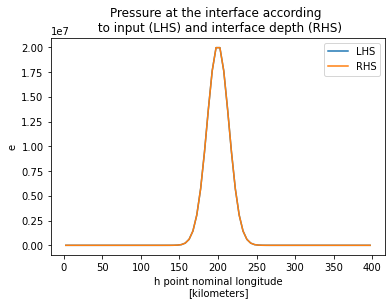

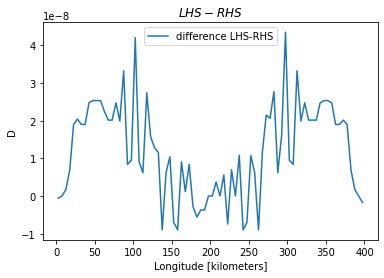

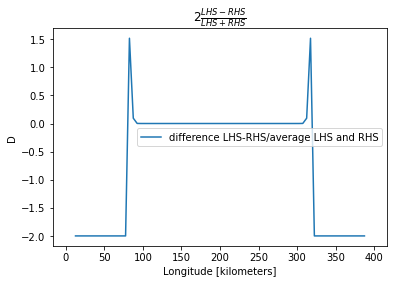

interface z values [ 5.68434189e-14 -0.00000000e+00 -1.70530257e-13 -6.82121026e-13
 -1.87583282e-12 -2.01794137e-12 -1.87583282e-12 -1.87583282e-12
 -2.44426701e-12 -2.50111043e-12 -2.50111043e-12 -2.50111043e-12
 -2.21689334e-12 -1.98951966e-12 -1.98951966e-12 -2.44426701e-12
  3.12638804e-13  3.31397132e-11  5.67354164e-10  7.84299914e-09
  9.55512860e-08  1.02731349e-06  9.74688794e-06  8.16096961e-05
  6.03018640e-04  3.93217548e-03  2.26281075e-02  1.14915011e-01
  5.15013330e-01  2.03691695e+00  7.10953548e+00  2.18988816e+01
  5.95271288e+01  1.42797080e+02  3.02297049e+02  5.64751798e+02
  9.31087372e+02  1.35467210e+03  1.73937274e+03  1.97092614e+03
  1.97092614e+03  1.73937274e+03  1.35467210e+03  9.31087372e+02
  5.64751798e+02  3.02297049e+02  1.42797080e+02  5.95271288e+01
  2.18988816e+01  7.10953548e+00  2.03691695e+00  5.15013330e-01
  1.14915011e-01  2.26281075e-02  3.93217548e-03  6.03018639e-04
  8.16096960e-05  9.74688794e-06  1.02731281e-06  9.55511439e-08
  7.84

In [17]:
H_thick = xr.open_dataset('INPUT/fatseamountice-x2.nc').D
(8820*H_thick).isel(lath = 0).plot(label = 'LHS')

g = 9.8
rho_0 = 1000
z = -xr.open_dataset('prog.nc').e.isel(zi = 0, yh = 0, Time = 0)
S_top = 33.8
S_bot = 34.55
H = 4000
beta = 1.0

RHS = g*rho_0*(z + beta/rho_0*((S_top*z)+(z**2/2)*(S_bot-S_top)/H))

(RHS).plot(label = 'RHS')
plt.title('Pressure at the interface according \n to input (LHS) and interface depth (RHS)')

plt.legend()
plt.show()

((8820*H_thick).isel(lath = 0)-RHS.values).plot(label = 'difference LHS-RHS')
plt.legend()
plt.title('$LHS-RHS$')
plt.show()

(2*((8820*H_thick).isel(lath = 0)-RHS.values)/(((8820*H_thick).isel(lath = 0)+RHS.values))).plot(label = 'difference LHS-RHS/average LHS and RHS')
plt.legend()
plt.title(r'$2\frac{LHS-RHS}{LHS+RHS}$')
plt.show()

print('interface z values', z.values)

## try to double domain but keep original shape

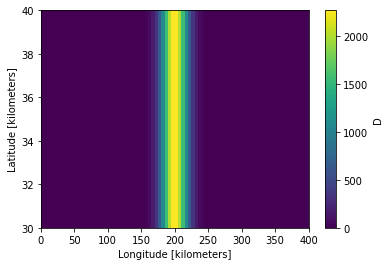

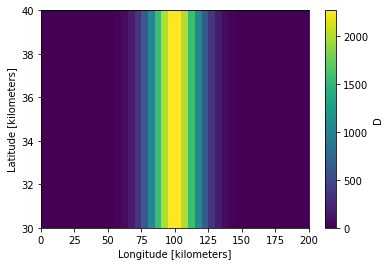

In [3]:
ds = xr.open_dataset('INPUT/fatseamountice-x2.nc')
ds.D.plot()
plt.show()
ds1 = xr.open_dataset('INPUT/fatseamountice.nc')
ds1.D.plot()


In [20]:
ds['D']=ds.D*0+np.pad(ds1.D.values,((0,0),(20,20)), mode = 'constant',constant_values = 0)
ds.to_netcdf('INPUT/fatseamountice-x2-ogsm.nc')

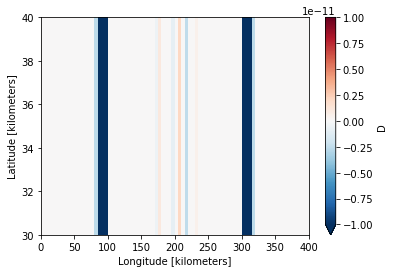

In [25]:
(xr.open_dataset('INPUT/fatseamountice-x2-ogsm.nc').D-xr.open_dataset('INPUT/fatseamountice-x2.nc').D).plot(vmax = 1e-11)

In [16]:
np.pad(ds1.D.values,((0,0),(20,20)), mode = 'constant',constant_values = 0)

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.09761345e-07, 1.18004180e-06, 1.11959260e-05, 9.37423406e-05,
        6.92667413e-04, 4.51675891e-03, 2.59921529e-02, 1.31999044e-01,
        5.91578673e-01, 2.33973904e+00, 8.16649168e+00, 2.51545653e+01,
        6.83771977e+01, 1.64028370e+02, 3.47248062e+02, 6.48744789e+02,
        1.06959933e+03, 1.55625785e+03, 1.99827463e+03, 2.26434181e+03,
        2.26434181e+03, 1.99827463e+03, 1.55625785e+03, 1.06959933e+03,
        6.48744789e+02, 3.47248062e+02, 1.64028370e+02, 6.83771977e+01,
        2.51545653e+01, 8.16649168e+00, 2.33973904e+00, 5.91578673e-01,
        1.31999044e-01, 2.59921529e-02, 4.51675891e-03, 6.926674

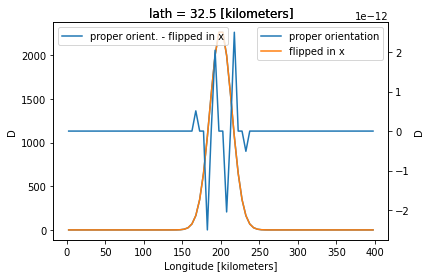

In [32]:
fig,ax = plt.subplots()
ds = xr.open_dataset('INPUT/fatseamountice-x2.nc').D
ds.isel(lath = 0).plot(label = 'proper orientation')
(ds*0+np.flip(ds.values,axis = 1)).isel(lath = 0).plot(label = 'flipped in x')
plt.legend()
ax2 = ax.twinx()

(ds-np.flip(ds.values,axis = 1)).isel(lath = 0).plot(ax = ax2, label = 'proper orient. - flipped in x')
plt.legend()

if it starts asymmetric with ice draft (from seamount exponenetial??) i can't really expect it to get symmetric.